<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/Caminantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st
from itertools import accumulate
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

##

In [8]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

def plot_dist(x,y):
    ''' plotting environment we frequently use to visualise the
    sampling algorithms.'''

    sns.set_style('white')
    plt.rcdefaults()

    # plot contour
    g = sns.JointGrid(x=x, y=y, height=10).plot_joint(sns.kdeplot, n_levels=4, cmap="BuPu", shade=True, shade_lowest=False)

    # add scatter plot of data
    g = g.plot_joint(plt.scatter, c="r", s=30, linewidth=1)
    plt.plot(x, y, linestyle='-', marker='', alpha=0.4, )

    # set axis labels
    g.set_axis_labels("$X$", "$Y$")

def traceplot(x):
    '''traceplot in the x-dimension with the cumulative mean (r)
    and the actual mean (--)'''
    sns.tsplot(x)
    l = list(accumulate(x))
    nl = [v/i for i, v in enumerate(l,1)]
    plt.plot(nl, 'r')
    plt.axhline(y=0.0, color='k', linestyle='--')
    plt.ylabel('x')
    plt.xlabel('Iteration')

def autocorrelation_plot(x, l):
    '''plots the autocorrelation of x to lag = l'''
    plt.acorr(x - np.mean(x), maxlags=l,  normed=True, usevlines=False);
    plt.xlim((0, 100))
    plt.ylabel('Autocorrelation')
    plt.xlabel('Lag')


In [9]:
# set mean and covariance for Q
mean = np.array([0, 1])
var = np.array([[1, .5], [.5, 1]])

Text(0.5, 0, '$\\pi(x,y)$')

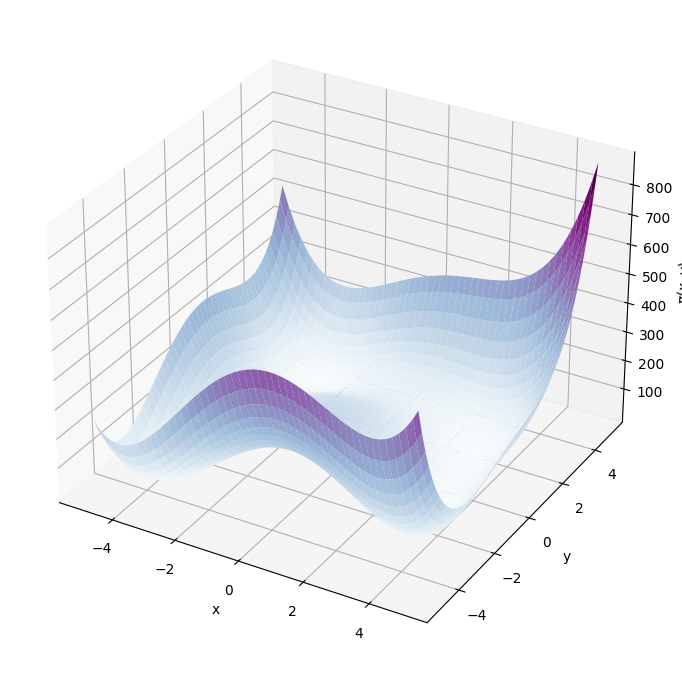

In [43]:
# create grid for 3D plot
x, y = np.linspace(-5, 5, 200), np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)

# generate bivariate normal
Z =himmelblau(X,Y)

# plot surface in 3D
fig = plt.figure(figsize=(12,8.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap= 'BuPu')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\pi(x,y)$')

### Definimos la 2D distribución objetivo:

In [11]:
def ptarget(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mean, cov=var)

In [19]:
def paraboiloide(x, y, h=2, k=4):
    return (x**2+y**2)/4000-(np.cos(x)+1)*(np.cos(y/2**(0.5))+1)

In [38]:
def griewank(x, y, h=0, k=0):
    term1 = 1 + (x - h)**2 + (y - k)**2 / 4000
    term2 = np.cos((x - h) / np.sqrt(1)) * np.cos((y - k) / np.sqrt(2))
    return term1 - term2


In [26]:
def himmelblau(x, y):
    term1 = ( (x )**2 + (y) - 11 )**2
    term2 = ( (x ) + (y )**2 - 7 )**2
    return term1 + term2


### Construimos un método para el algoritmo Metropolis-Hastings, sus parámetros de entrada serán:
- p: distribución objetivo
- n: número de iteraciones del algoritmo
- x0, y0: punto de partida.
- step: tamaño del paso

In [6]:
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points = np.zeros((n, 2)) # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.normal(scale=step,size=2)

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1832: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


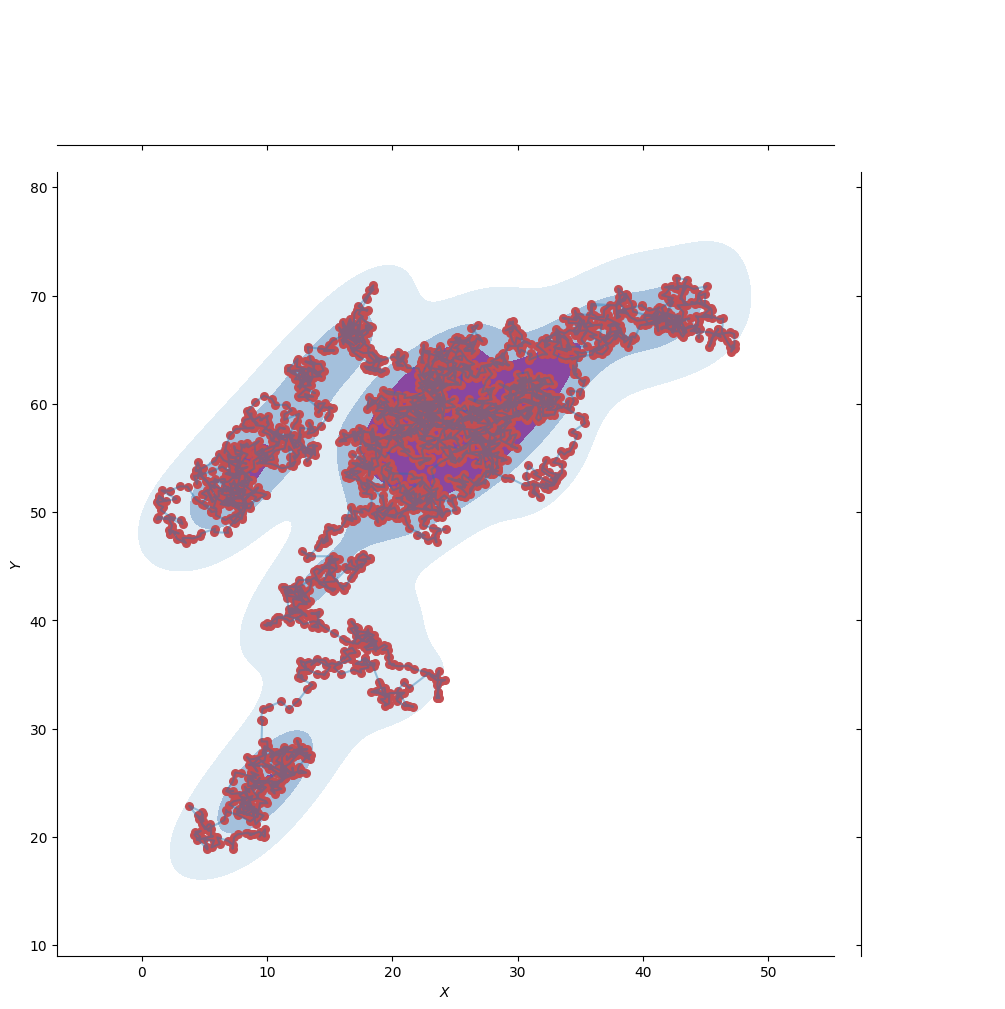

In [62]:
# generate the samples
samples = metropolis_hastings(himmelblau, 3000, 10, 20, 0.5)

# visualise
plot_dist(samples[:, 0], samples[:, 1])
plt.savefig('caminates.png')